In [1]:
from model import train_cnn, plot_loss, increase_brightness, convert_RGB
from visualization import read_preview_images, show_lambda_crop_layers,  predict_layer_output
import cv2, csv
import numpy as np
from keras.models import Model
from keras.models import load_model
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Train model

In [2]:
batch = 105
epochs = 10
model_name = "model_b105e10"
history_object = train_cnn(epochs, batch, model_name+".h5")

Training samples:  40240
Validation samples:  7545



/home/carnd/SelfDrivingCarND-Proj4/model.py:110: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), strides=(2, 2), name="conv1", activation="relu")`
  model.add(Conv2D(24, (5, 5), subsample=(2,2), activation='relu',name='conv1'))
/home/carnd/SelfDrivingCarND-Proj4/model.py:111: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), strides=(2, 2), name="conv2", activation="relu")`
  model.add(Conv2D(36, (5, 5), subsample=(2,2), activation='relu', name='conv2'))
/home/carnd/SelfDrivingCarND-Proj4/model.py:112: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), strides=(2, 2), name="conv3", activation="relu")`
  model.add(Conv2D(48, (5, 5), subsample=(2,2), activation='relu', name='conv3'))


Epoch 1/10
96/95 [==============================] - 119s 1s/step - loss: 0.0557 - val_loss: 0.0511
Epoch 2/10
96/95 [==============================] - 111s 1s/step - loss: 0.0441 - val_loss: 0.0448
Epoch 3/10
96/95 [==============================] - 111s 1s/step - loss: 0.0387 - val_loss: 0.0400
Epoch 4/10
96/95 [==============================] - 111s 1s/step - loss: 0.0350 - val_loss: 0.0396
Epoch 5/10
96/95 [==============================] - 111s 1s/step - loss: 0.0316 - val_loss: 0.0354
Epoch 6/10
96/95 [==============================] - 113s 1s/step - loss: 0.0292 - val_loss: 0.0305
Epoch 7/10
96/95 [==============================] - 110s 1s/step - loss: 0.0265 - val_loss: 0.0269
Epoch 8/10
96/95 [==============================] - 110s 1s/step - loss: 0.0246 - val_loss: 0.0286
Epoch 9/10
96/95 [==============================] - 111s 1s/step - loss: 0.0236 - val_loss: 0.0241
Epoch 10/10
96/95 [==============================] - 111s 1s/step - loss: 0.0220 - val_loss: 0.0219


dict_keys(['val_loss', 'loss'])


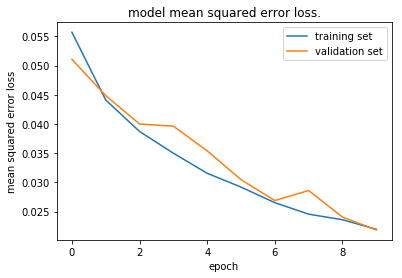

In [3]:
plot_loss(history_object, model_name)

## Load saved model

In [4]:
#load the saved model
model = load_model(model_name+".h5")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 160, 320, 3)       0         
_________________________________________________________________
crop (Cropping2D)            (None, 90, 320, 3)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 43, 158, 24)       1824      
_________________________________________________________________
conv2 (Conv2D)               (None, 20, 77, 36)        21636     
_________________________________________________________________
conv3 (Conv2D)               (None, 8, 37, 48)         43248     
_________________________________________________________________
conv4 (Conv2D)               (None, 6, 35, 64)         27712     
_________________________________________________________________
conv5 (Conv2D)               (None, 4, 33, 64)         36928     
__________

## Read example images for CNN visualization

In [5]:
#read the preview images
img_num = 10
images = read_preview_images(img_num)
print(images.shape)
for img in images:
    img = convert_RGB(img)

(6, 160, 320, 3)


## Predict output of lambda and crop layers

In [6]:
#predict output of lambda and crop layers
#output saved to /CNN_images/output

show_lambda_crop_layers(images, model)

Input array shape:  (6, 160, 320, 3)
Norm layer output shape:  (6, 160, 320, 3)
Crop layer output shape:  (6, 90, 320, 3)
Predicted images saved.


## Predict output of convolutional layers

In [7]:
#predict output of convolutional layers
#output saved to /CNN_images/output

layer_name = 'conv1'
predict_layer_output(images, model, layer_name)

The conv1 layer shape is (6, 43, 158, 24) and has 24 filters
There are 6 input images 
Combined filter image array has shape: (115, 43, 158)
Each filter has 43 x 158
Combined image is 1548 x 632 and has 978336 pixels


In [8]:
layer_name = 'conv2'
predict_layer_output(images, model, layer_name)

The conv2 layer shape is (6, 20, 77, 36) and has 36 filters
There are 6 input images 
Combined filter image array has shape: (175, 20, 77)
Each filter has 20 x 77
Combined image is 1080 x 308 and has 332640 pixels


In [9]:
layer_name = 'conv3'
predict_layer_output(images, model, layer_name)

The conv3 layer shape is (6, 8, 37, 48) and has 48 filters
There are 6 input images 
Combined filter image array has shape: (235, 8, 37)
Each filter has 8 x 37
Combined image is 576 x 148 and has 85248 pixels


In [10]:
layer_name = 'conv4'
predict_layer_output(images, model, layer_name)

The conv4 layer shape is (6, 6, 35, 64) and has 64 filters
There are 6 input images 
Combined filter image array has shape: (315, 6, 35)
Each filter has 6 x 35
Combined image is 576 x 140 and has 80640 pixels


In [11]:
layer_name = 'conv5'
predict_layer_output(images, model, layer_name)

The conv5 layer shape is (6, 4, 33, 64) and has 64 filters
There are 6 input images 
Combined filter image array has shape: (315, 4, 33)
Each filter has 4 x 33
Combined image is 384 x 132 and has 50688 pixels
